In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import json
from collections import defaultdict

In [2]:
data = json.load(open('train.json'))
data

{'NLU00000': {'text': '还有双鸭山到淮阴的汽车票吗13号的',
  'intent': 'Travel-Query',
  'slots': {'destination': '淮阴',
   'departure': '双鸭山',
   'datetime_date': '13号',
   'query_type': '汽车票'}},
 'NLU00001': {'text': '从这里怎么回家',
  'intent': 'Travel-Query',
  'slots': {'destination': '家', 'query_type': '导航'}},
 'NLU00002': {'text': '随便播放一首专辑阁楼里的佛里的歌',
  'intent': 'Music-Play',
  'slots': {'album': '阁楼', 'play_mode': '随机播放'}},
 'NLU00003': {'text': '给看一下墓王之王嘛',
  'intent': 'FilmTele-Play',
  'slots': {'name': '墓王之王'}},
 'NLU00004': {'text': '我想看挑战两把s686打突变团竞的游戏视频',
  'intent': 'Video-Play',
  'slots': {'name': '挑战两把s686打突变团竞的游戏视频'}},
 'NLU00005': {'text': '我想看和平精英上战神必备技巧的游戏视频',
  'intent': 'Video-Play',
  'slots': {'name': '和平精英上战神必备技巧的游戏视频'}},
 'NLU00006': {'text': '2019年古装爱情电视剧小女花不弃的花絮播放一下',
  'intent': 'Video-Play',
  'slots': {'name': '小女花不弃的花絮', 'datetime_date': '2019年'}},
 'NLU00007': {'text': '找一个2004年的推理剧给我看一会呢',
  'intent': 'FilmTele-Play',
  'slots': {'tag': '推理', 'age': '2004年'}},
 'NLU00008'

In [5]:
_correspondence = defaultdict(list)
for idx, info_dict in data.items():
    if info_dict['slots']:
        _correspondence[info_dict['intent']].extend(list(info_dict['slots'].keys()))

correspondence = defaultdict(list)
for k, v in _correspondence.items():
    correspondence[k] = list(set(v))
    
correspondence

defaultdict(list,
            {'Travel-Query': ['query_type',
              'destination',
              'datetime_time',
              'departure',
              'datetime_date'],
             'Music-Play': ['language',
              'album',
              'artist',
              'song',
              'play_mode',
              'instrument',
              'age'],
             'FilmTele-Play': ['artist',
              'tag',
              'region',
              'play_setting',
              'age',
              'name'],
             'Video-Play': ['datetime_time',
              'region',
              'name',
              'datetime_date'],
             'Radio-Listen': ['channel', 'artist', 'name', 'frequency'],
             'HomeAppliance-Control': ['command', 'details', 'appliance'],
             'Weather-Query': ['type',
              'index',
              'datetime_time',
              'city',
              'datetime_date'],
             'Alarm-Update': ['datetime_time', 'notes',

In [7]:
slot_k = []
intent = []
for k, v in correspondence.items():
    slot_k.extend(v)
    intent.append(k)
    
slot_k = list(set(slot_k))
slot_k

['album',
 'command',
 'notes',
 'artist',
 'instrument',
 'name',
 'region',
 'song',
 'age',
 'appliance',
 'query_type',
 'type',
 'tag',
 'frequency',
 'index',
 'destination',
 'play_mode',
 'departure',
 'datetime_date',
 'language',
 'details',
 'channel',
 'play_setting',
 'datetime_time',
 'city']

In [13]:
intent_few = ['Audio-Play', 'TVProgram-Play']

In [11]:
data4df = {
    'intent': [],
    'idx': []
}
for i in slot_k:
    data4df[i] = []
    
data4df

{'intent': [],
 'idx': [],
 'album': [],
 'command': [],
 'notes': [],
 'artist': [],
 'instrument': [],
 'name': [],
 'region': [],
 'song': [],
 'age': [],
 'appliance': [],
 'query_type': [],
 'type': [],
 'tag': [],
 'frequency': [],
 'index': [],
 'destination': [],
 'play_mode': [],
 'departure': [],
 'datetime_date': [],
 'language': [],
 'details': [],
 'channel': [],
 'play_setting': [],
 'datetime_time': [],
 'city': []}

In [12]:
for idx, info_dict in data.items():
    data4df['intent'].append(info_dict['intent'])
    data4df['idx'].append(idx)
    for i in slot_k:
        if i in info_dict['slots']:
            data4df[i].append(True)
        else:
            data4df[i].append(False)

df = pd.DataFrame(data4df)
df

,intent,idx,album,command,notes,artist,instrument,name,region,song,...,destination,play_mode,departure,datetime_date,language,details,channel,play_setting,datetime_time,city
0,Travel-Query,NLU00000,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
1,Travel-Query,NLU00001,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Music-Play,NLU00002,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,FilmTele-Play,NLU00003,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Video-Play,NLU00004,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9095,Music-Play,NLU09095,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9096,Weather-Query,NLU09096,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9097,Travel-Query,NLU09097,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
9098,Travel-Query,NLU09098,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [26]:
df_music_play['album'].sum()

158

In [23]:
df_music_play = df.loc[df['intent']=='Music-Play']
df_music_play

,intent,idx,album,command,notes,artist,instrument,name,region,song,...,destination,play_mode,departure,datetime_date,language,details,channel,play_setting,datetime_time,city
2,Music-Play,NLU00002,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
10,Music-Play,NLU00010,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
16,Music-Play,NLU00016,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
28,Music-Play,NLU00028,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
29,Music-Play,NLU00029,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,Music-Play,NLU09065,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9066,Music-Play,NLU09066,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9078,Music-Play,NLU09078,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9081,Music-Play,NLU09081,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
res_m = {}
for i in correspondence['Music-Play']:
    res_m[i] = df_music_play[i].sum()
res_m

{'language': 146,
 'album': 158,
 'artist': 436,
 'song': 424,
 'play_mode': 396,
 'instrument': 109,
 'age': 180}

In [56]:
res_all = {}
for i in slot_k:
    res_all[i] = df[i].sum()
res_all

{'album': 158,
 'command': 994,
 'notes': 696,
 'artist': 1150,
 'instrument': 109,
 'name': 2236,
 'region': 458,
 'song': 424,
 'age': 367,
 'appliance': 963,
 'query_type': 945,
 'type': 419,
 'tag': 384,
 'frequency': 331,
 'index': 503,
 'destination': 917,
 'play_mode': 396,
 'departure': 384,
 'datetime_date': 3244,
 'language': 152,
 'details': 652,
 'channel': 622,
 'play_setting': 233,
 'datetime_time': 1143,
 'city': 840}

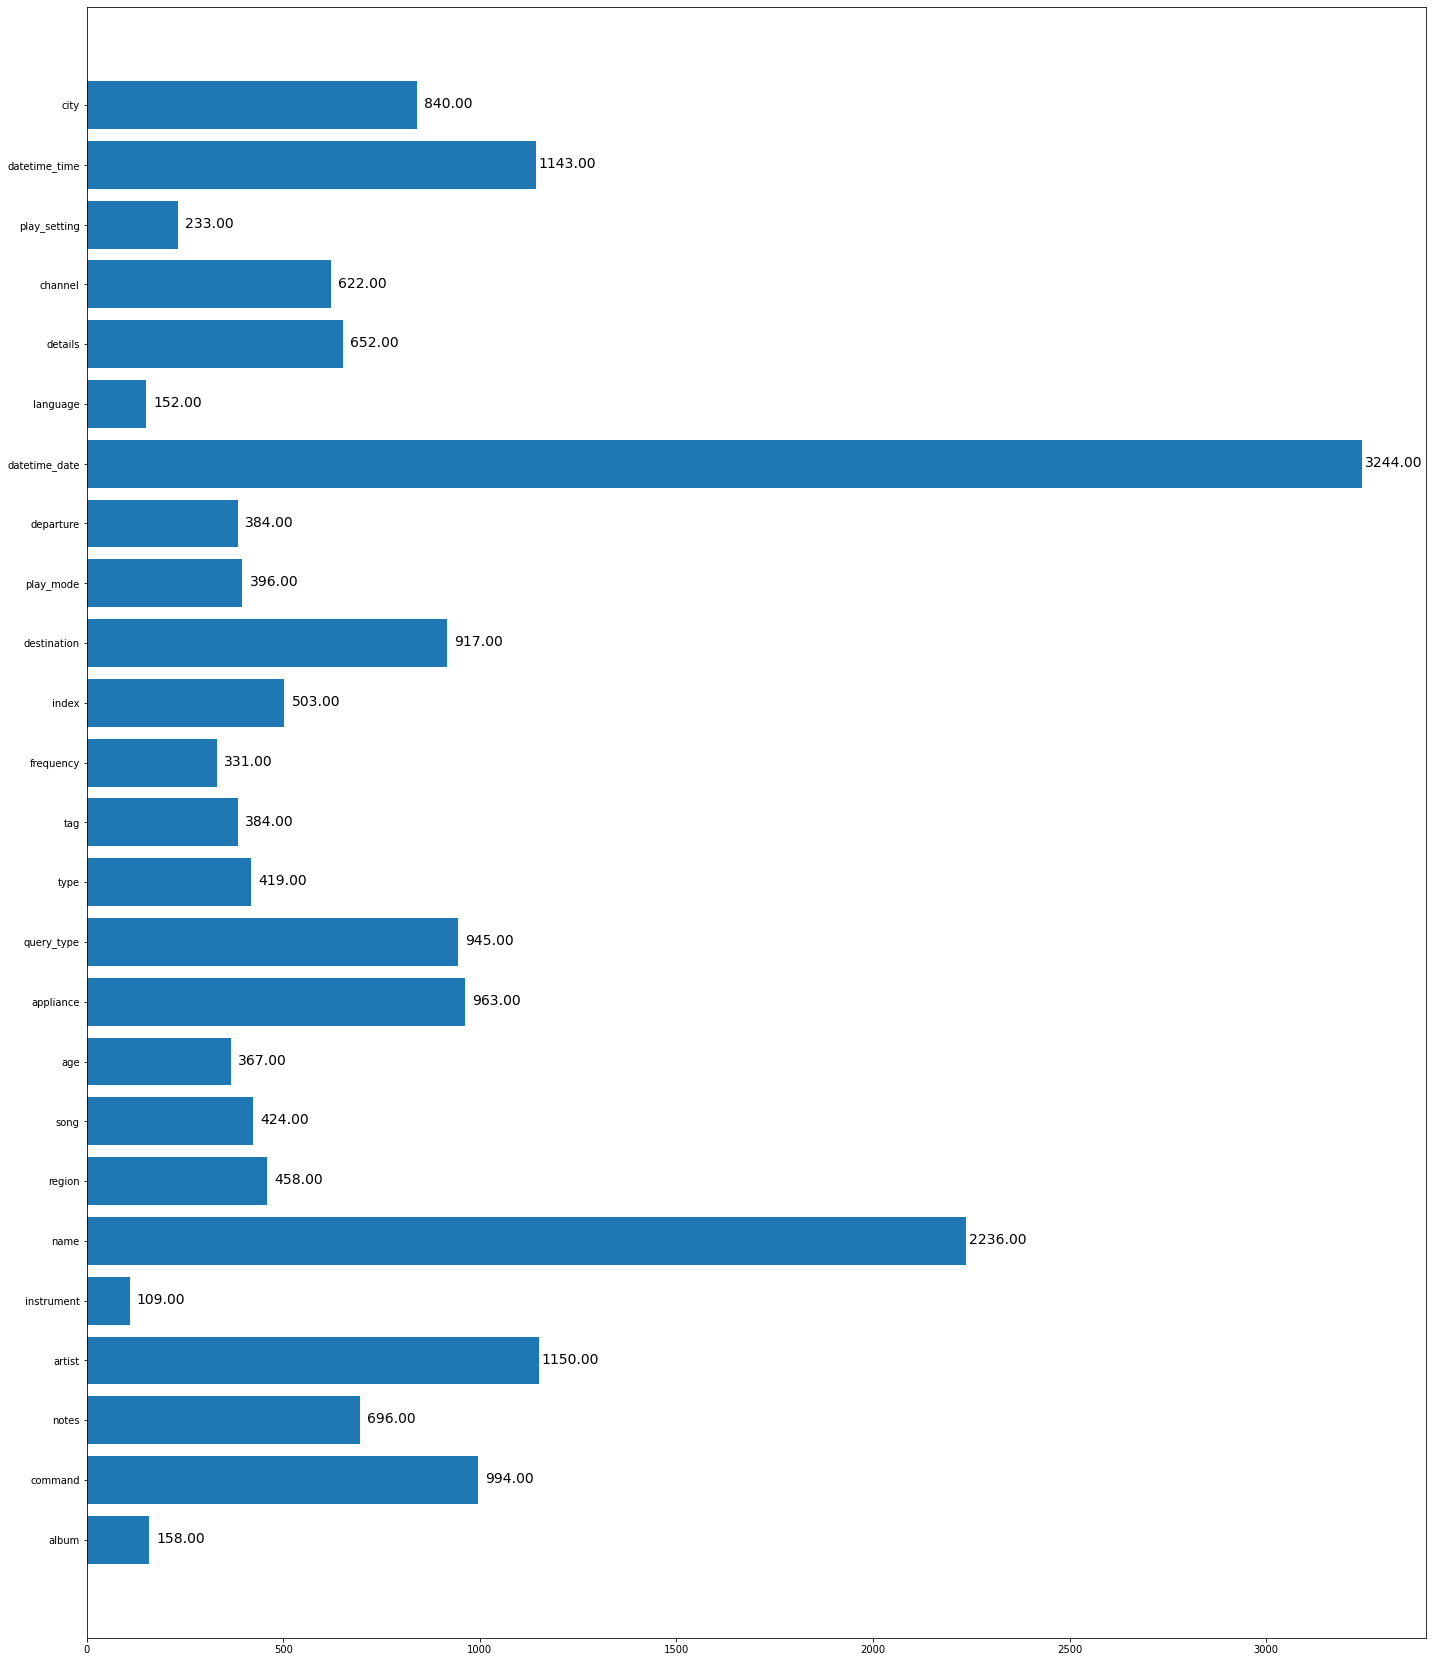

In [65]:
fig, ax = plt.subplots(figsize=(24,30))
ax.barh(range(len(res_all)), [v for k,v in res_all.items()], tick_label=list(res_all.keys()))
for b,a in zip(range(len(res_all)),[v for k,v in res_all.items()]): ##控制标签位置
    plt.text(a+80, b-0.1,'%.2f'%a,ha = 'center',va = 'bottom',fontsize=14)

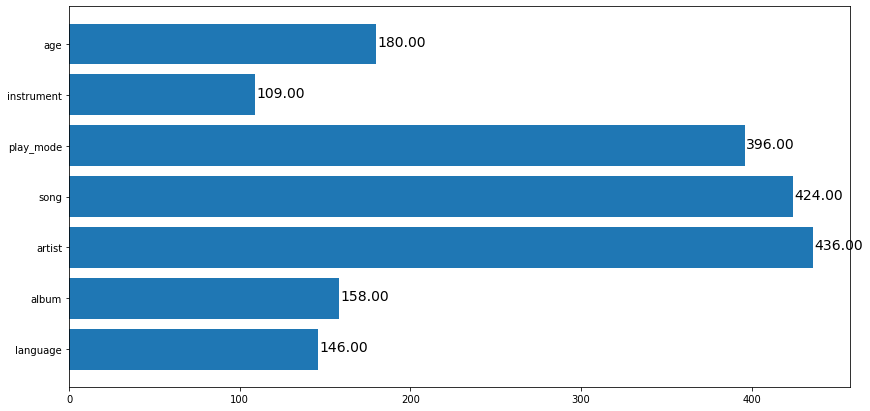

In [55]:
# fig, ax = plt.subplots(3,3,figsize=(42,21))
# ax[0]
fig, ax = plt.subplots(figsize=(14,7))
ax.barh(range(len(res_m)), [v for k,v in res_m.items()], tick_label=list(res_m.keys()))
for b,a in zip(range(len(res_m)),[v for k,v in res_m.items()]): ##控制标签位置
    plt.text(a+15, b-0.1,'%.2f'%a,ha = 'center',va = 'bottom',fontsize=14)

In [71]:
df_index_type = df.loc[df['type']==True]

In [72]:
df_index_type = df_index_type[df_index_type['index']==True]

In [73]:
df_index_type

,intent,idx,album,command,notes,artist,instrument,name,region,song,...,destination,play_mode,departure,datetime_date,language,details,channel,play_setting,datetime_time,city
696,Weather-Query,NLU00696,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1187,Weather-Query,NLU01187,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1859,Weather-Query,NLU01859,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2115,Weather-Query,NLU02115,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2993,Weather-Query,NLU02993,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3177,Weather-Query,NLU03177,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3831,Weather-Query,NLU03831,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4779,Weather-Query,NLU04779,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
5570,Weather-Query,NLU05570,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5756,Weather-Query,NLU05756,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
